In [50]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
import os
import matplotlib.pyplot as plt
import numpy as np
from random import randint

In [10]:
IMG_WIDTH=48
IMG_HRIGHT=48
barch_size=32

train_data_dir='data/train'
valid_data_dir='data/test'

In [9]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest')
validation_datagen=ImageDataGenerator(
    rescale=1./255)

In [34]:
train_generator=train_datagen.flow_from_directory(train_data_dir,
                                                  color_mode='grayscale' ,
                                                  target_size=(IMG_HRIGHT,IMG_WIDTH),
                                                  batch_size=barch_size,
                                                  class_mode='categorical',
                                                  shuffle=True)
validation_generator=validation_datagen.flow_from_directory(valid_data_dir,
                                                  color_mode='grayscale' ,
                                                  target_size=(IMG_HRIGHT,IMG_WIDTH),
                                                  batch_size=barch_size,
                                                  class_mode='categorical',
                                                  shuffle=True)
                                                  

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [35]:
class_lables=['angry','desgust','fear','happy','neutral','sad','surprise']
img,label=train_generator.__next__()

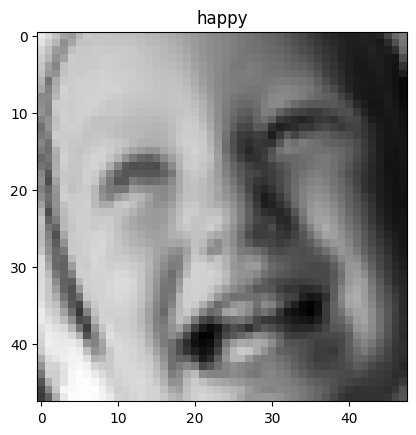

In [36]:
i=randint(0,(img.shape[0])-1)
image=img[i]
lab=class_lables[label[i].argmax()]
plt.imshow(image[:,:,0], cmap='gray')
plt.title(lab)
plt.show()

In [51]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


In [52]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)                   │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 46, 46, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 44, 44, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 44, 44, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 22, 22, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 22, 22, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 20, 20, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 20, 20, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 18, 18, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 18, 18, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 9, 9, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 9, 9, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 7, 7, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 512)                 │              

 Total params: 734,055 (2.80 MB)

 Trainable params: 733,415 (2.80 MB)

 Non-trainable params: 640 (2.50 KB)

In [53]:
train_data='data/train'
test_data='data/test'

num_train_img=0
for root, dirs , files in os.walk(train_data):
    num_train_img=len(files)
num_test_img=0
for root, dirs , files in os.walk(test_data):
    num_test_img=len(files)

print(num_train_img,num_test_img)

3171 831


In [54]:
epochs=50

history=model.fit(train_generator,
                  steps_per_epoch=num_train_img,
                  epochs=epochs,
                  validation_data=validation_generator,
                  validation_steps=num_test_img)

Epoch 1/50
 898/3171 ━━━━━━━━━━━━━━━━━━━━ 14:38 386ms/step - accuracy: 0.2029 - loss: 2.5760

C:\Users\amine\anaconda3\envs\tf310\lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


3171/3171 ━━━━━━━━━━━━━━━━━━━━ 426s 133ms/step - accuracy: 0.2176 - loss: 2.2559 - val_accuracy: 0.3008 - val_loss: 1.7624
Epoch 2/50
3171/3171 ━━━━━━━━━━━━━━━━━━━━ 71s 22ms/step - accuracy: 0.2576 - loss: 1.8029 - val_accuracy: 0.3082 - val_loss: 1.7605
Epoch 3/50
3171/3171 ━━━━━━━━━━━━━━━━━━━━ 67s 21ms/step - accuracy: 0.2798 - loss: 1.7599 - val_accuracy: 0.3455 - val_loss: 1.7362
Epoch 4/50
3171/3171 ━━━━━━━━━━━━━━━━━━━━ 69s 22ms/step - accuracy: 0.3010 - loss: 1.7277 - val_accuracy: 0.3544 - val_loss: 1.8261
Epoch 5/50
3171/3171 ━━━━━━━━━━━━━━━━━━━━ 67s 21ms/step - accuracy: 0.3236 - loss: 1.6944 - val_accuracy: 0.3775 - val_loss: 1.6877
Epoch 6/50
3171/3171 ━━━━━━━━━━━━━━━━━━━━ 67s 21ms/step - accuracy: 0.3365 - loss: 1.6683 - val_accuracy: 0.3909 - val_loss: 1.6270
Epoch 7/50
3171/3171 ━━━━━━━━━━━━━━━━━━━━ 67s 21ms/step - accuracy: 0.3472 - loss: 1.6442 - val_accuracy: 0.4071 - val_loss: 1.5692
Epoch 8/50
3171/3171 ━━━━━━━━━━━━━━━━━━━━ 68s 21ms/step - accuracy: 0.3583 - loss: 1.

In [55]:

model.save('emotion_detection_model_50epochs_2.h5')

In [56]:
from keras.models import load_model
my_model=load_model('emotion_detection_model_50epochs.h5', compile=False)
my_model2=load_model('emotion_detection_model_50epochs_2.h5', compile=False)


In [57]:
test_img , test_label= validation_generator.__next__()
pridections1=my_model.predict(test_img)
pridections2=my_model2.predict(test_img)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


In [58]:
pridections1=np.argmax(pridections1,axis=1)
pridections2=np.argmax(pridections2,axis=1)
test_label=np.argmax(test_label,axis=1)

In [59]:
from sklearn import metrics

print("accuracy 1:",  metrics.accuracy_score(test_label,pridections1),'accurcy 2:',   metrics.accuracy_score(test_label,pridections2))

accuracy 1: 0.59375 accurcy 2: 0.65625


In [60]:
from sklearn.metrics import confusion_matrix

cm1=confusion_matrix(test_label,pridections1)
cm2=confusion_matrix(test_label,pridections2)

<Axes: >

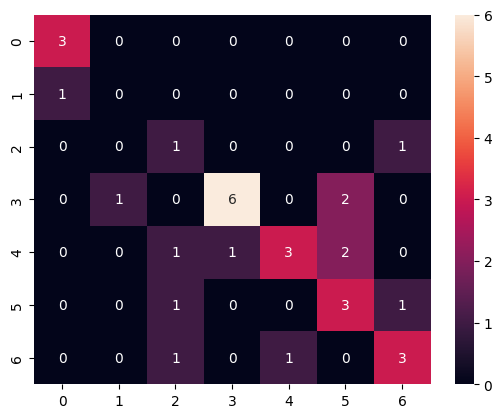

In [62]:
import seaborn as sns 
sns.heatmap(cm1,annot=True)


<Axes: >

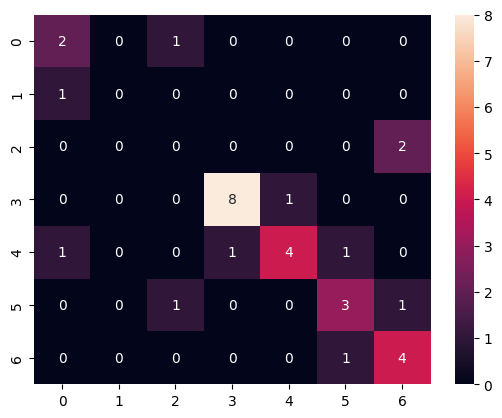

In [63]:
sns.heatmap(cm2,annot=True)